<a href="https://colab.research.google.com/github/docum5/Prediction_Classify_Hotel_Booking/blob/main/Classification_Hotel_Cancel_or_Not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load libraries
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Mengimport dataset

#inisial kan beberapa kode yang akan dikategorikan sebagai missing values
missing_values = ["n/a", "na", "--",'?'] 


df =pd.read_csv('/content/drive/MyDrive/hotel_bookings.csv', na_values = missing_values) 

In [5]:
# Mengambil sebagian dari dataset, yaitu sebanyak 50000 data
df = df.sample(n=50000, random_state=42)

In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## ***Deskripsi Variabel :***

1. is_canceled = Value indicating if the booking was canceled (1) or not (0)
2. lead_time = Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
3. arrival_date_year = Year of arrival date
4. arrival_date_month = Month of arrival date with 12 categories: “January” to “December”
5. arrival_date_week_number	 = Week number of the arrival date
6. arrival_date_day_of_month = Day of the month of the arrival date
7. stays_in_weekend_nights = BO and BL/ Calculated by counting the number of weekend nights from the total number of nights
8. stays_in_week_nights = Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
9. adults = Number of adults
10. children = Number of children
11. babies = Number of babies
12. meal = Type of meal booked. Categories are presented in standard hospitality meal packages:Undefined/SC – no meal package;BB – Bed & Breakfast;HB – Half board (breakfast and one other meal – usually dinner);FB – Full board (breakfast, lunch and dinner)
13. country = Country of origin
14. market_segment = Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour             Operators”
15. distribution_channel = Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
16. is_repeated_guest = Value indicating if the booking name was from a repeated guest (1) or not (0)
17. previous_cancellations = Number of previous bookings that were cancelled by the customer prior to the current booking
18. previous_bookings_not_canceled = Number of previous bookings not cancelled by the customer prior to the current booking
19. reserved_room_type = Code of room type reserved. Code is presented instead of designation for anonymity reasons 
20. assigned_room_type = Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the       reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of       designation for anonymity reasons
21. booking_changes = Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until     the moment of check-in or cancellation
22. deposit_type = Indication on if the customer made a deposit to guarantee the booking. This variable can assume three             categories:No Deposit – no deposit was made;
23. agent = ID of the travel agency that made the bookinga
24. company = ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of       designation for anonymity reasons
25. days_in_waiting_list = 	Number of days the booking was in the waiting list before it was confirmed to the customer
26. customer_type = Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking        
27. adr = Average Daily Rate
28. required_car_parking_spaces = Number of car parking spaces required by the customer
29. total_of_special_requests = Number of special requests made by the customer (e.g. twin bed or high floor)
30. reservation_status = Reservation last status, assuming one of three categories:Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why               
31. reservation_status_date = 	Date at which the last status was set. This variable can be used in conjunction with the             ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

# Exploratory Data Analysis(EDA)

In [7]:
pd.set_option("display.max_columns", None)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30946,Resort Hotel,0,203,2016,December,49,2,2,5,2,0.0,0,BB,GBR,Direct,Direct,0,0,0,F,F,4,No Deposit,250.0,NaN,0,Transient,66.8,0,0,Check-Out,2016-12-09
40207,City Hotel,1,82,2015,July,29,16,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,76.5,0,0,Canceled,2015-07-16
103708,City Hotel,0,25,2016,December,53,27,0,3,3,0.0,0,BB,BRA,Offline TA/TO,TA/TO,0,0,0,A,K,2,No Deposit,220.0,NaN,0,Transient-Party,60.0,0,1,Check-Out,2016-12-30
85144,City Hotel,0,1,2016,March,11,9,0,1,1,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient-Party,95.0,0,0,Check-Out,2016-03-10
109991,City Hotel,0,70,2017,April,16,16,2,2,2,0.0,0,SC,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,108.0,0,0,Check-Out,2017-04-20


In [8]:
df.reset_index(inplace=True)

In [9]:
df.drop(['index'],axis=1,inplace=True)

In [10]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,203,2016,December,49,2,2,5,2,0.0,0,BB,GBR,Direct,Direct,0,0,0,F,F,4,No Deposit,250.0,NaN,0,Transient,66.8,0,0,Check-Out,2016-12-09
1,City Hotel,1,82,2015,July,29,16,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,76.5,0,0,Canceled,2015-07-16
2,City Hotel,0,25,2016,December,53,27,0,3,3,0.0,0,BB,BRA,Offline TA/TO,TA/TO,0,0,0,A,K,2,No Deposit,220.0,NaN,0,Transient-Party,60.0,0,1,Check-Out,2016-12-30
3,City Hotel,0,1,2016,March,11,9,0,1,1,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient-Party,95.0,0,0,Check-Out,2016-03-10
4,City Hotel,0,70,2017,April,16,16,2,2,2,0.0,0,SC,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,108.0,0,0,Check-Out,2017-04-20


In [11]:
df.shape

(50000, 32)

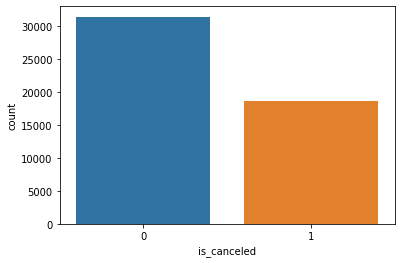

In [12]:
sns.countplot(data =df,x=('is_canceled'));

In [13]:
# summarize the class ratio

from collections import Counter
# summarize the class distribution
target = df['is_canceled'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=0, Count=31420, Percentage=62.840%
Class=1, Count=18580, Percentage=37.160%


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           50000 non-null  object 
 1   is_canceled                     50000 non-null  int64  
 2   lead_time                       50000 non-null  int64  
 3   arrival_date_year               50000 non-null  int64  
 4   arrival_date_month              50000 non-null  object 
 5   arrival_date_week_number        50000 non-null  int64  
 6   arrival_date_day_of_month       50000 non-null  int64  
 7   stays_in_weekend_nights         50000 non-null  int64  
 8   stays_in_week_nights            50000 non-null  int64  
 9   adults                          50000 non-null  int64  
 10  children                        50000 non-null  float64
 11  babies                          50000 non-null  int64  
 12  meal                            

In [15]:
#Mengganti tipe variabel reservation_status_date menjadi datetime

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [16]:
# Mengekstrak hari reservation status

df['Reservation_day'] = pd.to_datetime(df['reservation_status_date'],format="%d/%m/%Y").dt.day 

In [17]:
# Mengekstrak bulan reservation status

df['Reservation_month'] = pd.to_datetime(df['reservation_status_date'],format="%d/%m/%Y").dt.month

In [18]:
# Karena bulan reservasi dan bulan arrival_date_month akan selalu sama, maka kita bisa drop variabel arrival_date_month

df.drop(['arrival_date_month'],axis = 1,inplace=True)

In [19]:
# Karena kita sudah mengambil informasi yang dibutuhkan pada variabel 'reservation_status_date', maka variabel tersebut sudah tidak dibutuhkan

df.drop(['reservation_status_date'],axis = 1,inplace=True)

In [20]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,50000.0,0.371600,0.483237,0.00,0.0000,0.0,1.0,1.0
lead_time,50000.0,104.030080,106.953591,0.00,18.0000,69.0,161.0,737.0
arrival_date_year,50000.0,2016.157220,0.708288,2015.00,2016.0000,2016.0,2017.0,2017.0
arrival_date_week_number,50000.0,27.156940,13.592113,1.00,16.0000,28.0,38.0,53.0
arrival_date_day_of_month,50000.0,15.802880,8.754873,1.00,8.0000,16.0,23.0,31.0
stays_in_weekend_nights,50000.0,0.923300,0.992168,0.00,0.0000,1.0,2.0,19.0
stays_in_week_nights,50000.0,2.491960,1.896082,0.00,1.0000,2.0,3.0,50.0
adults,50000.0,1.857600,0.550898,0.00,2.0000,2.0,2.0,55.0
children,50000.0,0.102120,0.396856,0.00,0.0000,0.0,0.0,10.0
babies,50000.0,0.007960,0.098065,0.00,0.0000,0.0,0.0,9.0


### Dari Kota Mana Saja Tamu Berasal?

In [21]:
df['country'].unique()

array(['GBR', 'PRT', 'BRA', 'SWE', 'DEU', 'SVN', 'ESP', 'BEL', 'FRA',
       'USA', 'ARG', 'NLD', 'UGA', 'EST', 'TUR', 'AUT', 'LUX', 'KOR',
       'CHN', nan, 'AUS', 'ARE', 'JAM', 'IRL', 'AGO', 'NOR', 'CN', 'ISR',
       'DZA', 'CHE', 'MAR', 'ITA', 'NGA', 'CZE', 'FIN', 'JPN', 'RUS',
       'DNK', 'PRY', 'POL', 'LTU', 'HUN', 'MOZ', 'QAT', 'IND', 'GIB',
       'BIH', 'ROU', 'ISL', 'HRV', 'CIV', 'ZAF', 'BGR', 'LVA', 'COL',
       'KWT', 'DOM', 'CHL', 'SGP', 'ECU', 'IRN', 'ARM', 'BEN', 'GRC',
       'BLR', 'SRB', 'ALB', 'TGO', 'EGY', 'MEX', 'MCO', 'AZE', 'CYP',
       'MDV', 'KEN', 'TMP', 'MUS', 'SVK', 'IDN', 'GEO', 'TZA', 'SEN',
       'NZL', 'VEN', 'JOR', 'PRI', 'BOL', 'LCA', 'UKR', 'GTM', 'AND',
       'BGD', 'CRI', 'MWI', 'URY', 'TWN', 'PAK', 'BRB', 'SAU', 'MKD',
       'HKG', 'GNB', 'MYS', 'PHL', 'THA', 'MYT', 'KAZ', 'LIE', 'MAC',
       'TUN', 'ABW', 'GAB', 'LBN', 'CAF', 'LBY', 'FRO', 'HND', 'CPV',
       'PER', 'MLT', 'CMR', 'OMN', 'ZWE', 'BHR', 'JEY', 'TJK', 'DJI',
       'CUB', 'I

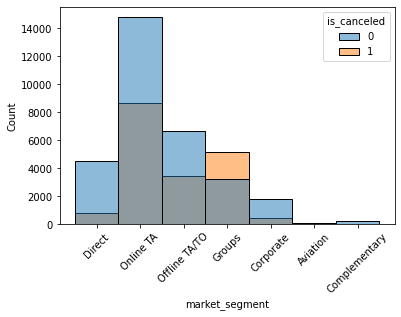

In [22]:
# Plot Histogram
sns.histplot(data = df, x = "market_segment", hue = "is_canceled")
plt.xticks(rotation=45);

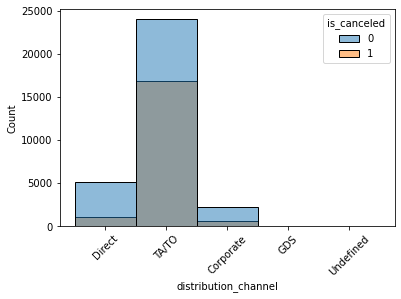

In [23]:
# Plot Histogram
sns.histplot(data = df, x = "distribution_channel", hue = "is_canceled")
plt.xticks(rotation=45);

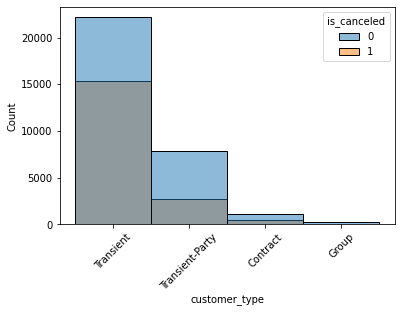

In [24]:
# Plot Histogram
sns.histplot(data = df, x = "customer_type", hue = "is_canceled")
plt.xticks(rotation=45);

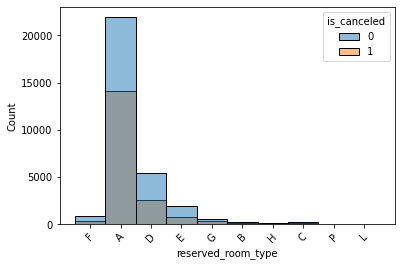

In [25]:
# Plot Histogram
sns.histplot(data = df, x = "reserved_room_type", hue = "is_canceled")
plt.xticks(rotation=45);

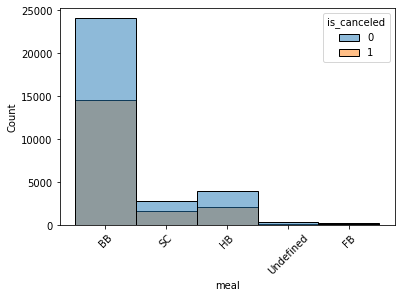

In [26]:
# Plot Histogram
sns.histplot(data = df, x = "meal", hue = "is_canceled")
plt.xticks(rotation=45);

In [ ]:
cross_tab_prop = pd.crosstab(columns=df['is_canceled'],
                             index=df['meal'],
                             normalize='index')
cross_tab_prop


In [ ]:
df[df['lead_time']>0]

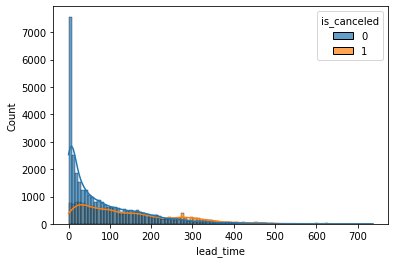

In [72]:
sns.histplot(data=df,
            x = 'lead_time'
            ,alpha = .7
            ,hue = 'is_canceled',
             kde=True
            )

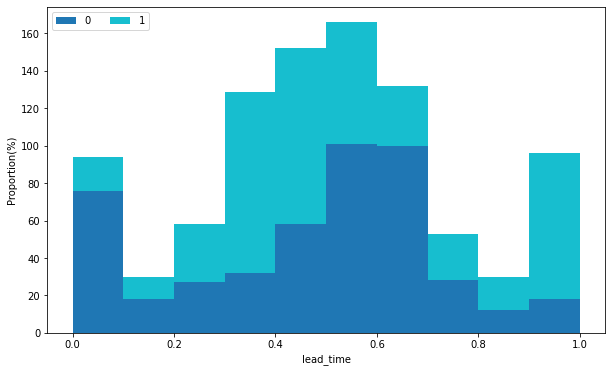

In [55]:
cross_tab_prop = pd.crosstab(columns=df['is_canceled'],
                             index=df['lead_time'],
                             normalize='index')
cross_tab_prop.plot(kind='hist', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("lead_time")
plt.ylabel("Proportion(%)")
plt.show()

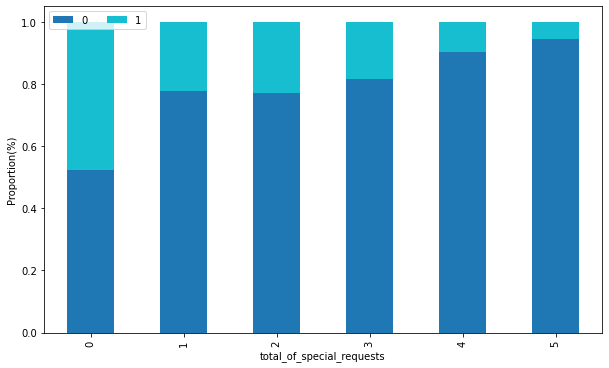

In [53]:
cross_tab_prop = pd.crosstab(columns=df['is_canceled'],
                             index=df['total_of_special_requests'],
                             normalize='index')
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("total_of_special_requests")
plt.ylabel("Proportion(%)")
plt.show()

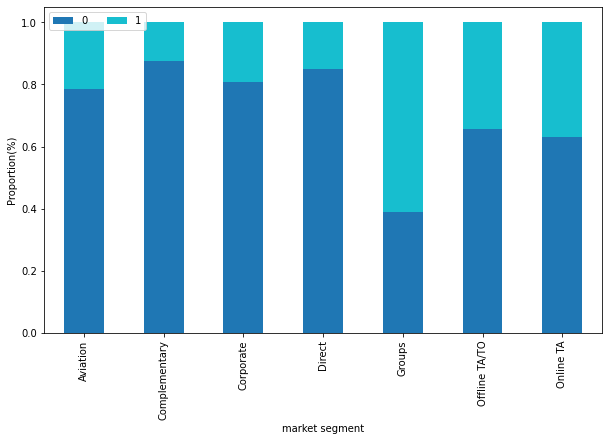

In [52]:
cross_tab_prop = pd.crosstab(columns=df['is_canceled'],
                             index=df['market_segment'],
                             normalize='index')
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("market segment")
plt.ylabel("Proportion(%)")
plt.show()

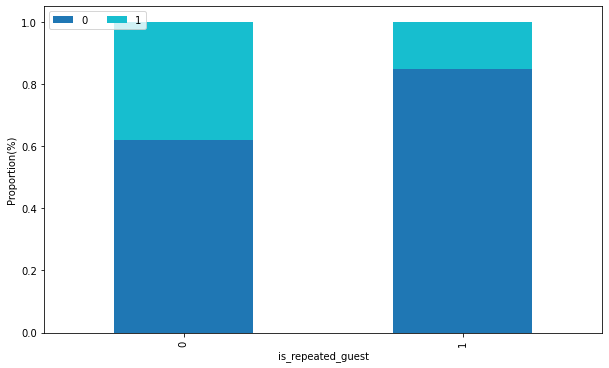

In [51]:
cross_tab_prop = pd.crosstab(columns=df['is_canceled'],
                             index=df['is_repeated_guest'],
                             normalize='index')
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("is_repeated_guest")
plt.ylabel("Proportion(%)")
plt.show()

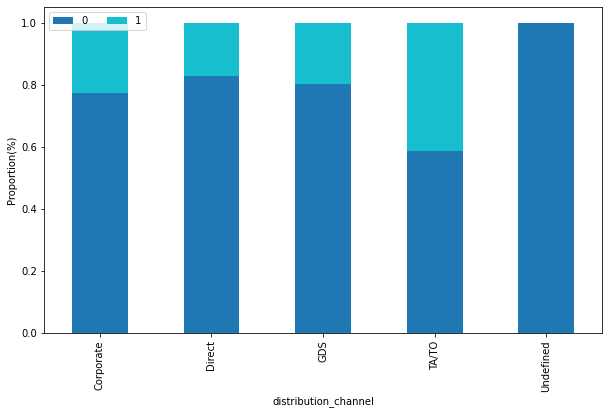

In [50]:
cross_tab_prop = pd.crosstab(columns=df['is_canceled'],
                             index=df['distribution_channel'],
                             normalize='index')
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("distribution_channel")
plt.ylabel("Proportion(%)")
plt.show()

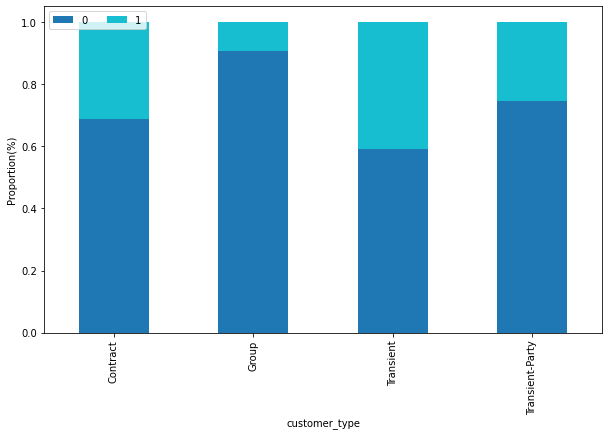

In [49]:
cross_tab_prop = pd.crosstab(columns=df['is_canceled'],
                             index=df['customer_type'],
                             normalize='index')
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("customer_type")
plt.ylabel("Proportion(%)")
plt.show()

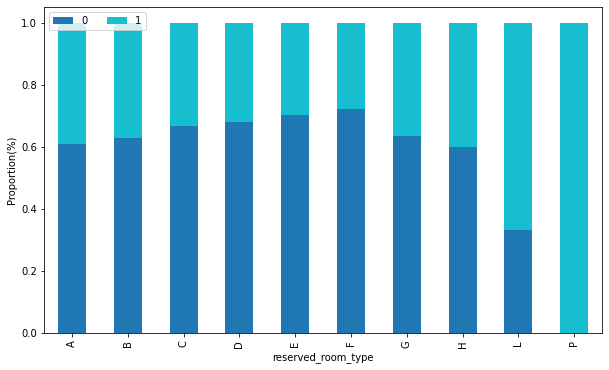

In [48]:
cross_tab_prop = pd.crosstab(columns=df['is_canceled'],
                             index=df['reserved_room_type'],
                             normalize='index')
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("reserved_room_type")
plt.ylabel("Proportion(%)")
plt.show()

In [40]:
cross_tab = pd.crosstab(columns=df['is_canceled'],
                        index=df['meal'])
cross_tab

is_canceled,0,1
meal,,
BB,24106,14542
FB,131,202
HB,4027,2084
SC,2784,1639
Undefined,372,113


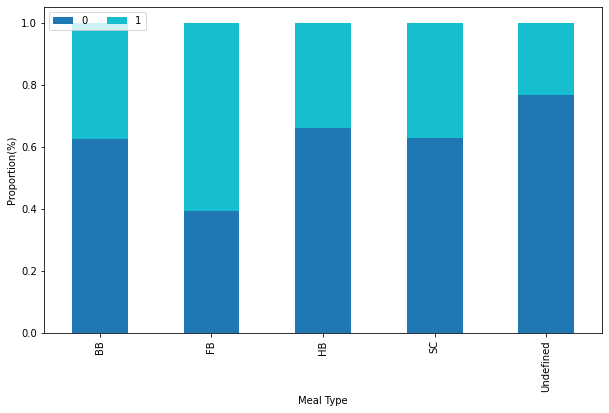

In [45]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Meal Type")
plt.ylabel("Proportion(%)")
plt.show()

In [43]:
cross_tab.index.values

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

### Berapa harga room per night? Ada perbedaan hargakah?

In [ ]:
2+4

6

In [ ]:
#Rata rata harga kamar per malam setiap harinya(pertanggal)
mean_pertanggal = df.groupby(['arrival_date_day_of_month'])['adr'].mean()
mean_pertanggal.mean()

102.06600569805039

***Rata rata harga kamar adalah 102.06600569805039 setiap malam nya setiap hari***

In [ ]:
#Rata rata harga kamar per malam setiap minggunya 
mean_permingguan = df.groupby(['arrival_date_week_number'])['adr'].mean()
mean_permingguan.mean()

97.01279834916075

***Rata rata harga kamar adalah 97.01279834916075 setiap minggunya***

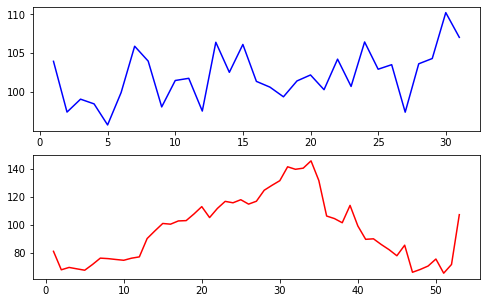

In [ ]:
fig, axs = plt.subplots(2, # number of rows
                     1, # number of columns
                     figsize=(8, 5))
#Rata rata harga kamar per malam setiap harinya(pertanggal)
axs[0].plot(mean_pertanggal.index, mean_pertanggal, color ='blue') 
#Rata rata harga kamar per malam setiap minggunya 
axs[1].plot(mean_permingguan.index, mean_permingguan, color ='red');

***Berdasarkan grafik diatas dapat kita lihat harga kamar permalamnya cukup fluktuatif***

In [ ]:
#Rata rata harga kamar permalam
df['adr'].mean()

101.95530819999895

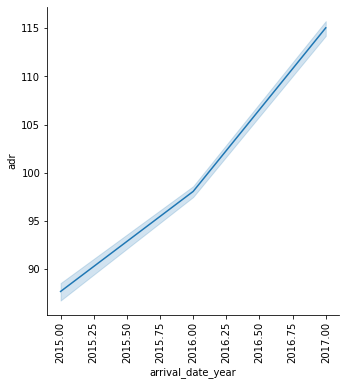

In [ ]:
#Range harga setiap tahunnya
sns.relplot(x="arrival_date_year", y="adr", kind="line", data=df)
plt.xticks(rotation=90);

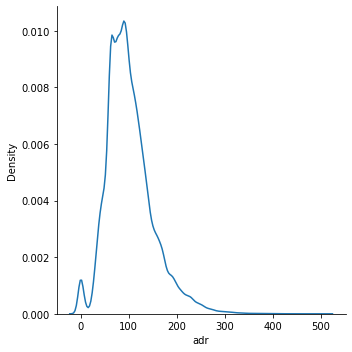

In [ ]:
sns.displot(df, x="adr", kind="kde");

#### Perbandingan Harga Berdasarkan Pesanan

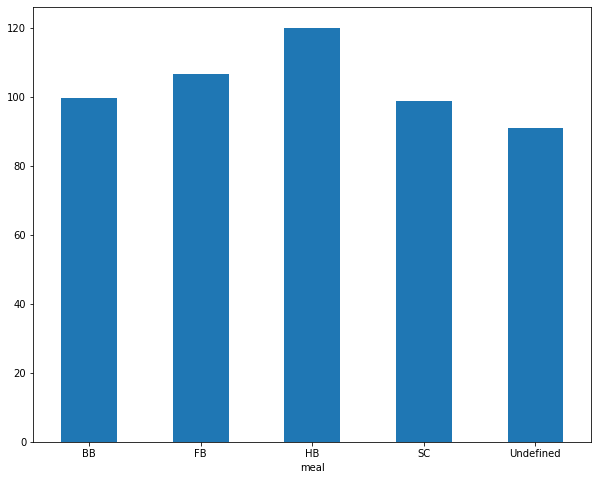

In [ ]:
df.groupby(['meal'])['adr'].mean().plot(x='meal', y='adr', rot=0, kind='bar', figsize=(10,8));

#### Berapa lama tamu tinggal di hotel?

In [ ]:
sum_column = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df["Total Durasi Menginap"] = sum_column

In [ ]:
df["Total Durasi Menginap"].mean()

3.41526

***Rata rata tamu menginap selama 3-4 hari***

In [ ]:
df["Total Durasi Menginap"] == df["Total Durasi Menginap"]

0        True
1        True
2        True
3        True
4        True
         ... 
49995    True
49996    True
49997    True
49998    True
49999    True
Name: Total Durasi Menginap, Length: 50000, dtype: bool

In [ ]:
df.mean()[['stays_in_weekend_nights', 'stays_in_week_nights']].round()

stays_in_weekend_nights    1.0
stays_in_week_nights       2.0
dtype: float64

***Rata rata tamu menginap selama 1 malam ketika weekend dan menginap 2 malam ketika weekdays***

#### Ada market segment?

In [ ]:
df['market_segment'].unique()

array(['Direct', 'Online TA', 'Offline TA/TO', 'Groups', 'Corporate',
       'Aviation', 'Complementary'], dtype=object)

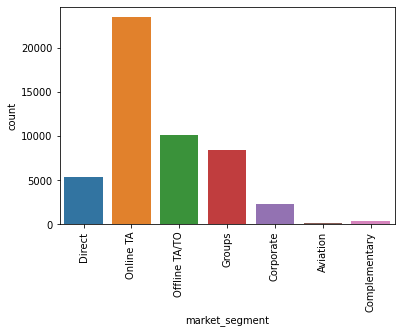

In [ ]:
sns.countplot(data=df,x='market_segment')
plt.xticks(rotation=90);

***Dari plot diatas dapat kita lihat kebanyakan pesanan dipesan melalu Travel Agents dan Tour Operations***

#### Berapa banyak booking yang dicancel/tidak dicancel?

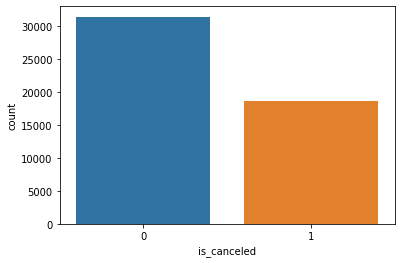

In [ ]:
sns.countplot(data=df,x='is_canceled');

In [ ]:
from collections import Counter
# summarize the class distribution
target = df['is_canceled'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=0, Count=31420, Percentage=62.840%
Class=1, Count=18580, Percentage=37.160%


***Sebanyak 62.840% dari pesanan(31420) berhasil dan 37.160% dari pesanan dicanceled oleh pemesan***

# Data Cleaning dan Preprocessing

## Cek Missing Values

In [ ]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             209
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              6842
company                           47155
days_in_waiting_list                  0


In [ ]:
def missing_data(df):
    miss1 = pd.DataFrame(df.isnull().sum()).reset_index()
    miss1.columns = ['columns', 'Num of Miss']
    miss2 = pd.DataFrame(df.isnull().sum()/df.shape[0]*100).reset_index()
    miss2.columns = ['columns', 'Perc of Miss']
    miss = miss1.merge(miss2, how='inner', on='columns')
    return miss[miss['Num of Miss']!=0]

In [ ]:
# Total number of missing values

print(df.isnull().sum().sum())

54206


In [ ]:
missing_data(df)

,columns,Num of Miss,Perc of Miss
12,country,209,0.418
22,agent,6842,13.684
23,company,47155,94.310


Handle company missing values

In [ ]:
##karena data yang hilang pada variabel company sebanyak 94 % maka sebaiknya variabel company kita hapus dari dataset

df.drop('company',inplace=True,axis=1)

In [ ]:
# Cek lagi berapa banyak missing values

missing_data(df)

,columns,Num of Miss,Perc of Miss
12,country,209,0.418
22,agent,6842,13.684


Handle country missing values 

In [ ]:
## Karena data yang hilang pada country < 1% maka kita bisa menghapus row tersebut 

df.dropna(subset = ['country'],inplace=True)

In [ ]:
# Cek lagi berapa banyak missing values

missing_data(df)

,columns,Num of Miss,Perc of Miss
22,agent,6697,13.450222


dapat kita lihat jumlah missing values dari variabel agent sedikit berkurang karena kita menghapus beberapa rows pada NaN values variabel country

Handle agent missing values 

In [ ]:
df[df['agent'].isnull()] 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,Reservation_day,Reservation_month,Total Durasi Menginap
15,Resort Hotel,0,23,2017,16,20,0,2,2,0.0,0,BB,GBR,Groups,Direct,0,0,0,A,A,0,No Deposit,NaN,0,Transient-Party,99.0,1,0,Check-Out,22,4,2
22,Resort Hotel,0,85,2017,16,19,1,4,2,0.0,0,BB,USA,Direct,Direct,0,0,0,E,E,2,No Deposit,NaN,0,Transient-Party,74.6,0,1,Check-Out,24,4,5
46,City Hotel,0,21,2015,51,17,0,2,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,0,Transient-Party,65.0,0,0,Check-Out,19,12,2
74,Resort Hotel,0,0,2017,3,17,0,1,1,0.0,0,BB,ESP,Direct,Direct,1,0,1,A,A,0,No Deposit,NaN,0,Transient,57.0,0,0,Check-Out,18,1,1
85,Resort Hotel,1,108,2016,18,29,2,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,NaN,0,Transient,84.0,0,0,Canceled,12,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49942,Resort Hotel,1,169,2016,14,31,1,3,2,0.0,0,BB,PRT,Groups,Direct,0,0,0,A,A,0,Refundable,NaN,0,Transient-Party,46.0,0,0,Canceled,24,3,4
49955,Resort Hotel,0,0,2015,50,9,0,1,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,NaN,0,Transient,40.0,0,0,Check-Out,10,12,1
49971,Resort Hotel,0,36,2016,43,20,0,3,1,0.0,0,BB,GBR,Groups,Corporate,0,0,0,A,D,1,No Deposit,NaN,0,Transient-Party,46.0,0,0,Check-Out,23,10,3
49996,City Hotel,1,0,2017,8,21,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,7,A,A,0,No Deposit,NaN,0,Transient,80.0,0,0,Canceled,21,2,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


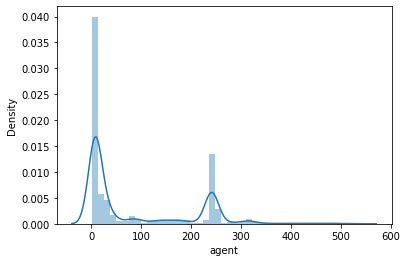

In [ ]:
# Cek distribusi dari variabel agent

sns.distplot(df['agent'].dropna())

In [ ]:
# Mengganti missing values menggunakan modus

df['agent'] = df['agent'].fillna(df['agent'].mode()[0])

In [ ]:
# Cek lagi berapa banyak missing values

missing_data(df)

,columns,Num of Miss,Perc of Miss


***Sudah Tidak Ada Lagi Missing Values Pada Dataset***

# Handling outliers

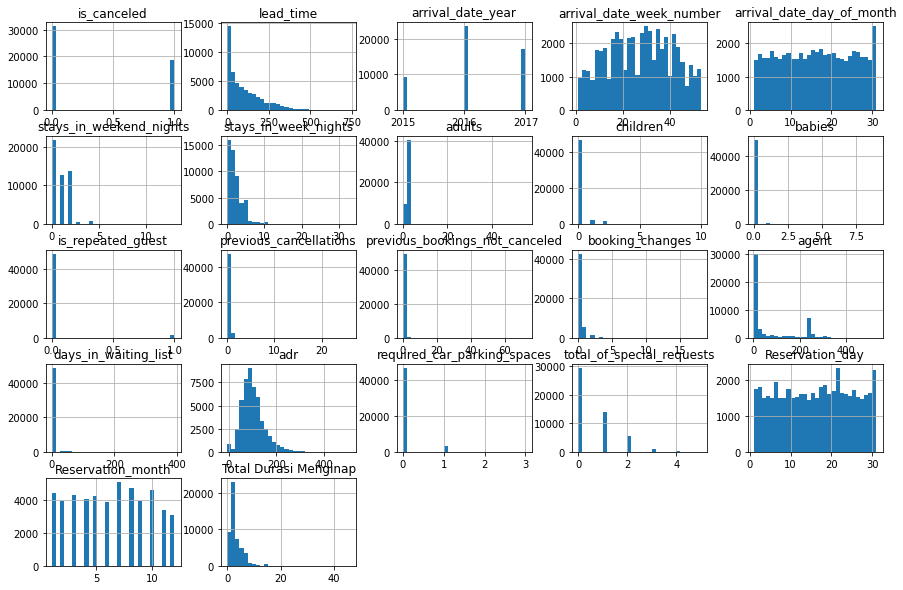

In [ ]:
# melihat apakah ada outliers melalui distribusi dari masing masing variabel

df.hist(bins=30, figsize=(15, 10));

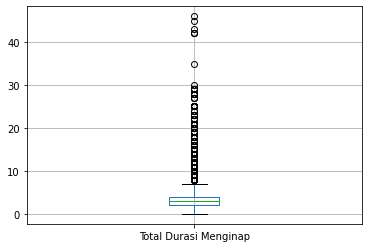

In [ ]:
df.boxplot(column="Total Durasi Menginap");

In [ ]:
# Karena dapat kita lihat variabel Tota Durasi Menginap tidak berdistribusi normal, maka kita bisa ngecek outliers dengan:

#### Lets compute the Interquantile range to calculate the boundaries
IQR=df['Total Durasi Menginap'].quantile(0.75)-df['Total Durasi Menginap'].quantile(0.25)

lower_bridge=df['Total Durasi Menginap'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Total Durasi Menginap'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-1.0
7.0


(None, None)

***Maka setiap konsumen yang menginap lebih dari 7 hari adalah outliers***

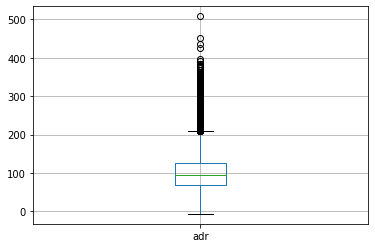

In [ ]:
df.boxplot(column="adr");

In [ ]:
# Karena dapat kita lihat variabel Tota Durasi Menginap berdistribusi normal, maka kita bisa ngecek outliers dengan:

uppper_boundary=df['adr'].mean() + 3* df['adr'].std()
lower_boundary=df['adr'].mean() - 3* df['adr'].std()
print(lower_boundary), print(uppper_boundary),print(df['adr'].mean())

-41.96261434454519
246.2173194117237
102.12735253358926


(None, None, None)

***Dari perhitungan tersebut dapat kita lihat untuk adr yang lebih dari 247 merupakan outliers dan rata rata adr setiap harinya adalah 102***

## Dari distribusi diatas dapat kita simpulkan banyak variabel yang memiliki outliers

***Apakah kita harus membuang outliers tersebut?***

Menurut saya pada beberapa kondisi kita tidak bisa membuang outliers tersebut karena setiap datanya mengandung kepentingan untuk output dari target.

seperti pada variabel Total Jumlah Konsumen menginap, kita tidak bisa membuang outliers nya karena bisa jadi itu menandakan musim liburan. 

Sebagai solusi mungkin disaat mengolahan data kita bisa menggunakan algoritma yang tidak sensitive terhadap outliers

Naivye Bayes Classifier--- Not Sensitive To Outliers

SVM-------- Not Sensitive To Outliers

Linear Regression---------- Sensitive To Outliers

Logistic Regression------- Sensitive To Outliers

Decision Tree Regressor or Classifier---- Not Sensitive

Ensemble(RF,XGboost,GB)------- Not Sensitive

KNN--------------------------- Not Sensitive

Kmeans------------------------ Sensitive

Hierarichal------------------- Sensitive

PCA-------------------------- Sensitive

Neural Networks-------------- Sensitive

# Handling Categorical Features

### Country

In [ ]:
nominal= df[['country','market_segment','distribution_channel','reserved_room_type'
             ,'assigned_room_type',
            'deposit_type','reservation_status','customer_type']]
ordinal=df['meal']

In [ ]:
df[["country"]].nunique()

country    150
dtype: int64

***Karena country memiliki banyak sekali unique value,akan kurang efektif jika kita menggunakan get_dummies karena akan membentuk banyak sekali variabel baru***

In [ ]:
# Menggunakan Count or frequency encoding

df["country"].value_counts().to_dict()

{'ABW': 2,
 'AGO': 159,
 'ALB': 7,
 'AND': 5,
 'ARE': 22,
 'ARG': 99,
 'ARM': 7,
 'ASM': 1,
 'ATF': 1,
 'AUS': 184,
 'AUT': 509,
 'AZE': 7,
 'BDI': 1,
 'BEL': 938,
 'BEN': 2,
 'BFA': 1,
 'BGD': 6,
 'BGR': 30,
 'BHR': 4,
 'BIH': 7,
 'BLR': 9,
 'BOL': 2,
 'BRA': 960,
 'BRB': 1,
 'CAF': 2,
 'CHE': 742,
 'CHL': 24,
 'CHN': 385,
 'CIV': 1,
 'CMR': 3,
 'CN': 542,
 'COL': 31,
 'COM': 1,
 'CPV': 12,
 'CRI': 8,
 'CUB': 3,
 'CYP': 17,
 'CZE': 84,
 'DEU': 3104,
 'DJI': 1,
 'DNK': 181,
 'DOM': 6,
 'DZA': 44,
 'ECU': 12,
 'EGY': 20,
 'ESP': 3625,
 'EST': 33,
 'FIN': 208,
 'FRA': 4321,
 'FRO': 3,
 'GAB': 2,
 'GBR': 5102,
 'GEO': 10,
 'GIB': 8,
 'GNB': 4,
 'GRC': 52,
 'GTM': 3,
 'HKG': 12,
 'HND': 1,
 'HRV': 40,
 'HUN': 99,
 'IDN': 12,
 'IMN': 1,
 'IND': 65,
 'IRL': 1443,
 'IRN': 25,
 'IRQ': 1,
 'ISL': 22,
 'ISR': 265,
 'ITA': 1503,
 'JAM': 2,
 'JEY': 4,
 'JOR': 11,
 'JPN': 76,
 'KAZ': 8,
 'KEN': 2,
 'KHM': 1,
 'KNA': 1,
 'KOR': 47,
 'KWT': 8,
 'LAO': 1,
 'LBN': 12,
 'LBY': 5,
 'LCA': 1,
 'LIE': 3,
 

In [ ]:
# And now let's replace each label in country by its count
# first we make a dictionary that maps each label to the counts

df_frequency_map = df.country.value_counts().to_dict()

In [ ]:
# and now we replace X2 labels in the dataset df
df.country = df.country.map(df_frequency_map)

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,Reservation_day,Reservation_month,Total Durasi Menginap
0,Resort Hotel,0,203,2016,49,2,2,5,2,0.0,0,BB,5102,Direct,Direct,0,0,0,F,F,4,No Deposit,250.0,0,Transient,66.8,0,0,Check-Out,9,12,7
1,City Hotel,1,82,2015,29,16,0,3,2,0.0,0,BB,20348,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0,Transient,76.5,0,0,Canceled,16,7,3
2,City Hotel,0,25,2016,53,27,0,3,3,0.0,0,BB,960,Offline TA/TO,TA/TO,0,0,0,A,K,2,No Deposit,220.0,0,Transient-Party,60.0,0,1,Check-Out,30,12,3
3,City Hotel,0,1,2016,11,9,0,1,1,0.0,0,BB,424,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0,Transient-Party,95.0,0,0,Check-Out,10,3,1
4,City Hotel,0,70,2017,16,16,2,2,2,0.0,0,SC,5102,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0,Transient,108.0,0,0,Check-Out,20,4,4


In [ ]:
market_segment = df[["market_segment"]]

market_segment = pd.get_dummies(market_segment, drop_first= True)

market_segment.head()

,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA
0,0,0,1,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,0,0,1


In [ ]:
distribution_channel = df[["distribution_channel"]]

distribution_channel = pd.get_dummies(distribution_channel, drop_first= True)

distribution_channel.head()

,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [ ]:
reserved_room_type = df[["reserved_room_type"]]

reserved_room_type = pd.get_dummies(reserved_room_type, drop_first= True)

reserved_room_type.head()

,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L
0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0


In [ ]:
assigned_room_type = df[["assigned_room_type"]]

assigned_room_type = pd.get_dummies(assigned_room_type, drop_first= True)

assigned_room_type.head()

,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [ ]:
deposit_type = df[["deposit_type"]]

deposit_type = pd.get_dummies(deposit_type, drop_first= True)

deposit_type.head()

,deposit_type_Non Refund,deposit_type_Refundable
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [ ]:
reservation_status = df[["reservation_status"]]

reservation_status = pd.get_dummies(reservation_status, drop_first= True)

reservation_status.head()

,reservation_status_Check-Out,reservation_status_No-Show
0,1,0
1,0,0
2,1,0
3,1,0
4,1,0


In [ ]:
customer_type = df[["customer_type"]]

customer_type = pd.get_dummies(customer_type, drop_first= True)

customer_type.head()

,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,1,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0


In [ ]:
nominal.drop('country',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
nominal.columns

Index(['market_segment', 'distribution_channel', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'reservation_status',
       'customer_type'],
      dtype='object')

In [ ]:
# Gabungkan semua dataframe 

df = pd.concat([df,market_segment, distribution_channel, reserved_room_type,
       assigned_room_type, deposit_type, reservation_status,
       customer_type], axis = 1)

In [ ]:
# Hapus variabel yang sudah kita ubah 

df.drop(['market_segment', 'distribution_channel', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'reservation_status',
       'customer_type'], axis = 1, inplace = True)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,Reservation_day,Reservation_month,Total Durasi Menginap,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,reservation_status_Check-Out,reservation_status_No-Show,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,Resort Hotel,0,203,2016,49,2,2,5,2,0.0,0,BB,5102,0,0,0,4,250.0,0,66.8,0,0,9,12,7,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,City Hotel,1,82,2015,29,16,0,3,2,0.0,0,BB,20348,0,0,0,0,9.0,0,76.5,0,0,16,7,3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,City Hotel,0,25,2016,53,27,0,3,3,0.0,0,BB,960,0,0,0,2,220.0,0,60.0,0,1,30,12,3,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,City Hotel,0,1,2016,11,9,0,1,1,0.0,0,BB,424,0,0,0,0,9.0,0,95.0,0,0,10,3,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,City Hotel,0,70,2017,16,16,2,2,2,0.0,0,SC,5102,0,0,0,0,9.0,0,108.0,0,0,20,4,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
# Variabel meal merupakan Ordinal karena kita bisa adanya tingkatan harga berdasarkan meal
# Kita akan menggunakan LabelEncoder

df.replace({"Undefined": 0,"SC": 0,"BB": 1, "HB": 2, "FB": 3}, inplace = True)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,Reservation_day,Reservation_month,Total Durasi Menginap,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,reservation_status_Check-Out,reservation_status_No-Show,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,Resort Hotel,0,203,2016,49,2,2,5,2,0.0,0,1,5102,0,0,0,4,250.0,0,66.8,0,0,9,12,7,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,City Hotel,1,82,2015,29,16,0,3,2,0.0,0,1,20348,0,0,0,0,9.0,0,76.5,0,0,16,7,3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,City Hotel,0,25,2016,53,27,0,3,3,0.0,0,1,960,0,0,0,2,220.0,0,60.0,0,1,30,12,3,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,City Hotel,0,1,2016,11,9,0,1,1,0.0,0,1,424,0,0,0,0,9.0,0,95.0,0,0,10,3,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,City Hotel,0,70,2017,16,16,2,2,2,0.0,0,0,5102,0,0,0,0,9.0,0,108.0,0,0,20,4,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


# Handling duplicates

In [ ]:
# Cek apakah dataset memiliki duplicates values

df.duplicated().any()

True

In [ ]:
df.duplicated().sum()

10723

In [ ]:
df_dup = df.copy()
df_dup['Duplicated']  = df.duplicated()
df_dup

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,Reservation_day,Reservation_month,Total Durasi Menginap,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,reservation_status_Check-Out,reservation_status_No-Show,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,Duplicated
0,Resort Hotel,0,203,2016,49,2,2,5,2,0.0,0,1,5102,0,0,0,4,250.0,0,66.8,0,0,9,12,7,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,False
1,City Hotel,1,82,2015,29,16,0,3,2,0.0,0,1,20348,0,0,0,0,9.0,0,76.5,0,0,16,7,3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,False
2,City Hotel,0,25,2016,53,27,0,3,3,0.0,0,1,960,0,0,0,2,220.0,0,60.0,0,1,30,12,3,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,False
3,City Hotel,0,1,2016,11,9,0,1,1,0.0,0,1,424,0,0,0,0,9.0,0,95.0,0,0,10,3,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,False
4,City Hotel,0,70,2017,16,16,2,2,2,0.0,0,0,5102,0,0,0,0,9.0,0,108.0,0,0,20,4,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,City Hotel,0,98,2015,53,29,0,3,2,0.0,0,1,1503,0,0,0,0,83.0,0,59.5,0,2,1,1,3,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,False
49996,City Hotel,1,0,2017,8,21,0,1,1,0.0,0,1,20348,1,0,7,0,9.0,0,80.0,0,0,21,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,False
49997,City Hotel,1,262,2015,46,9,1,2,2,0.0,0,1,20348,0,1,0,0,1.0,0,62.8,0,0,4,9,3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,True
49998,City Hotel,1,20,2017,30,25,0,2,2,0.0,0,1,20348,0,0,0,0,9.0,0,140.0,0,0,6,7,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,False


In [ ]:
# Membuang semua duplicates values

df.drop_duplicates()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,Reservation_day,Reservation_month,Total Durasi Menginap,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,reservation_status_Check-Out,reservation_status_No-Show,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,Resort Hotel,0,203,2016,49,2,2,5,2,0.0,0,1,5102,0,0,0,4,250.0,0,66.80,0,0,9,12,7,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,City Hotel,1,82,2015,29,16,0,3,2,0.0,0,1,20348,0,0,0,0,9.0,0,76.50,0,0,16,7,3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,City Hotel,0,25,2016,53,27,0,3,3,0.0,0,1,960,0,0,0,2,220.0,0,60.00,0,1,30,12,3,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,City Hotel,0,1,2016,11,9,0,1,1,0.0,0,1,424,0,0,0,0,9.0,0,95.00,0,0,10,3,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,City Hotel,0,70,2017,16,16,2,2,2,0.0,0,0,5102,0,0,0,0,9.0,0,108.00,0,0,20,4,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,City Hotel,0,2,2016,9,26,0,1,2,0.0,0,1,20348,0,0,0,0,9.0,0,108.00,0,1,27,2,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
49993,City Hotel,0,8,2015,48,26,0,1,1,0.0,0,1,1503,0,0,0,0,7.0,0,62.37,0,0,27,11,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
49995,City Hotel,0,98,2015,53,29,0,3,2,0.0,0,1,1503,0,0,0,0,83.0,0,59.50,0,2,1,1,3,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
49996,City Hotel,1,0,2017,8,21,0,1,1,0.0,0,1,20348,1,0,7,0,9.0,0,80.00,0,0,21,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# Model Building

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,Reservation_day,Reservation_month,Total Durasi Menginap,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,reservation_status_Check-Out,reservation_status_No-Show,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,Resort Hotel,0,203,2016,49,2,2,5,2,0.0,0,1,5102,0,0,0,4,250.0,0,66.8,0,0,9,12,7,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,City Hotel,1,82,2015,29,16,0,3,2,0.0,0,1,20348,0,0,0,0,9.0,0,76.5,0,0,16,7,3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,City Hotel,0,25,2016,53,27,0,3,3,0.0,0,1,960,0,0,0,2,220.0,0,60.0,0,1,30,12,3,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,City Hotel,0,1,2016,11,9,0,1,1,0.0,0,1,424,0,0,0,0,9.0,0,95.0,0,0,10,3,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,City Hotel,0,70,2017,16,16,2,2,2,0.0,0,0,5102,0,0,0,0,9.0,0,108.0,0,0,20,4,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
# drop variabel hotel karena unique values tidak dibutuhkan dalam pemodelan

df.drop('hotel',axis=1,inplace=True)

In [ ]:
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,Reservation_day,Reservation_month,Total Durasi Menginap,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,reservation_status_Check-Out,reservation_status_No-Show,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,203,2016,49,2,2,5,2,0.0,0,1,5102,0,0,0,4,250.0,0,66.8,0,0,9,12,7,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,1,82,2015,29,16,0,3,2,0.0,0,1,20348,0,0,0,0,9.0,0,76.5,0,0,16,7,3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,25,2016,53,27,0,3,3,0.0,0,1,960,0,0,0,2,220.0,0,60.0,0,1,30,12,3,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,0,1,2016,11,9,0,1,1,0.0,0,1,424,0,0,0,0,9.0,0,95.0,0,0,10,3,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,0,70,2017,16,16,2,2,2,0.0,0,0,5102,0,0,0,0,9.0,0,108.0,0,0,20,4,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


***Semua variabel sudah berbentuk numerik,sehingga dataset siap untuk diolah***

## Normalize dan Split-out validation dataset

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer 

ct = make_column_transformer(
    (MinMaxScaler(), ['lead_time','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','meal','country','booking_changes','agent','days_in_waiting_list','adr','Reservation_day','Reservation_month','Total Durasi Menginap']) # get all values between 0 and 1
    
)

# Membagi data 

X = df.drop('is_canceled',axis=1)
y = df['is_canceled']
validation_size = 0.20
seed = 42

X_train, X_validation, y_train, y_validation = train_test_split(X, y,
test_size=validation_size, random_state=seed)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)

ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)

X_train = ct.transform(X_train)
X_validation = ct.transform(X_validation)

# Evaluate Algorithms: Baseline

In [ ]:
# Test options and evaluation metric

num_folds = 5
seed = 42
scoring = 'accuracy'

In [ ]:
# Spot-Check Algorithms

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR: 0.736242 (0.002669)
LDA: 0.736267 (0.002871)
KNN: 0.929956 (0.004216)
NB: 0.694692 (0.009071)
SVM: 0.926516 (0.002967)


## Algorithm Tuning

***Karena accuracy tertinggi diraih sementara oleh KNN dan SVM, maka kita akan mencoba untuk melakukan Hyperparameter Tuning pada kedua model tersebut***

### Tuning KNN

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Tune scaled KNN

neighbors = [3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
knn = KNeighborsClassifier()
gridknn = RandomizedSearchCV(knn,param_grid)

In [ ]:
gridknn.fit(X_train,y_train)

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [3, 5, 7, 9, 11, 13, 15,
                                                        17, 19, 21]})

In [ ]:
gridknn.best_params_

{'n_neighbors': 3}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


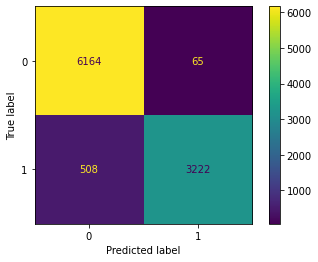

In [ ]:
plot_confusion_matrix(gridknn,X_validation,y_validation);

In [ ]:
predictions = gridknn.predict(X_validation)
print(classification_report(y_validation,predictions))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      6229
           1       0.98      0.86      0.92      3730

    accuracy                           0.94      9959
   macro avg       0.95      0.93      0.94      9959
weighted avg       0.94      0.94      0.94      9959



### Tuning SVM

In [ ]:
# Tune scaled SVM

c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
svm = SVC()
gridsvm = RandomizedSearchCV(svm,param_grid)


In [ ]:
gridsvm.fit(X_train,y_train)

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3,
                                              1.5, 1.7, 2.0],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [ ]:
gridsvm.best_params_

{'C': 1.7, 'kernel': 'rbf'}

In [ ]:
predictions = gridsvm.predict(X_validation)
print(classification_report(y_validation,predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      6229
           1       0.99      0.87      0.93      3730

    accuracy                           0.95      9959
   macro avg       0.96      0.93      0.94      9959
weighted avg       0.95      0.95      0.95      9959



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


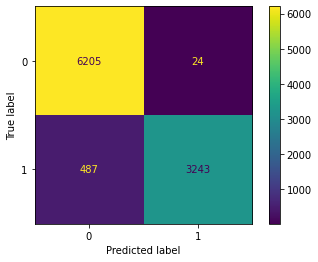

In [ ]:
plot_confusion_matrix(gridsvm,X_validation,y_validation)

# Ensemble Methods

In [ ]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.790721 (0.002154)
GBM: 0.908817 (0.003177)
RF: 0.938617 (0.004266)


***Karena model RandomForestClassifier juga menghasilkan nilai akurasi yang tinggi, maka kita akan mencoba untuk melakukan Hyperparameter Tuning pada RandomForestClassifier***

## Ensemble Tuning

In [ ]:
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score} 

In [ ]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [ ]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 403, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/p

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [ ]:
grid.best_params_

{'bootstrap': False,
 'max_features': 4,
 'n_estimators': 200,
 'oob_score': False}

In [ ]:
predictions = grid.predict(X_validation)

In [ ]:
print(classification_report(y_validation,predictions))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6229
           1       0.98      0.88      0.93      3730

    accuracy                           0.95      9959
   macro avg       0.96      0.94      0.94      9959
weighted avg       0.95      0.95      0.95      9959



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


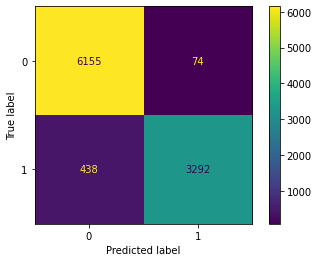

In [ ]:
plot_confusion_matrix(grid,X_validation,y_validation);

In [ ]:
# Mencoba Random Forest for Imbalanced Classification

rfc1 = RandomForestClassifier(bootstrap = False,
 max_features=4,
 n_estimators= 200,class_weight='balanced'
 )
rfc1.fit(X_train,y_train)
predictions1 = rfc1.predict(X_validation)
print(classification_report(y_validation,predictions1))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6229
           1       0.98      0.88      0.93      3730

    accuracy                           0.95      9959
   macro avg       0.96      0.93      0.94      9959
weighted avg       0.95      0.95      0.95      9959



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


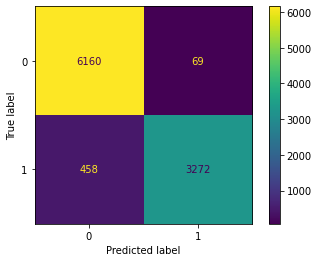

In [ ]:
plot_confusion_matrix(rfc1,X_validation,y_validation);

# Finalize Model

***Our Goal: Jenis kesalahan mana yang sangat berpengaruh terhadap kerugian
perusahaan?***

Ket lanjutan: 
- Cancel = 1 --> Positive event
- Tidak Cancel = 0 --> Negative event
- FP = Mesin memprediksi tamu tidak akan datang/ tidak akan ada tamu , Akan tetapi kenyataannya di hari tersebut ada tamu.

- FN = Mesin memprediksi tamu akan datang/ akan ada tamu pada hari tersebut, Akan tetapi ternyata tidak ada tamu yang datang(tamu tersebut melakukan cancel order)

***Pencarian model terbaik akan sangat bergantung kepada tujuan dari penggunaan model tersebut. Sesuai dengan goal yang telah diberikan, yaitu bagaimana agar kita bisa menekan kerugian dari perusahaan, sehingga kita harus mencari model yang dapat untuk menekan sebisa mungkin agar nilai dari FN untuk sekecil mungkin.***

***Alasan menggunakan model dengan FN terkecil: Karena jika dilihat dari definisi nya FN adalah ketika mesin memprediksi bahwa hari tersebut akan ada tamu, namun ternyata pada kenyataannya dihari tersebut tidak ada tamu. Secara logika kejadian tersebut akan sangat merugikan perusahaan. Jika kita lihat dari segi konsumsi, jika di prediksi pada hari tersebut akan diprediksi kedatangan tamu sebanyak 100 orang, maka hotel akan mempersiapkan sarapan sebanyak 100 pax. Namun pada kenyataannya pada hari tersebut tamu yang benar benar datang hanya 12 orang. Maka 88 pax sarapan yang sudah disiapkan tadi akan terbuang sia-sia.***


Dalam mencari model dengan FN terkecil dapat kita lakukan dengan: 

1. Melihat pada tabel confusion matrix bagian FN, cari nilai FN terkecil
2. Melihat pada classification report( Pilihlah model dengan Recall 1 dan Precision 0 terkecil)


Jika dilihat dari tabel confusion matrix dapat kita simpulkan :

KNN Model = menghasilkan FN sebanyak 5100 

SVM Model = menghasilkan FN sebanyak 4500 

RF Model = menghasilkan FN sebanyak 4300

RF + Weight Balance Model = menghasilkan FN sebanyak 4400

Neural Network With Tensorflow = menghasilkan FN sebanyak 8


***Sehingga dapat kita simpulkan model terbaik sejauh ini adalah Neural Network With Tensorflow dengan recall1 sebesar 1, precision0 sebesar 1, dan jumlah FN sebesar 8.***